In [36]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import scipy.stats as st

In [37]:
train = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Cost%20of%20Living%20Index%202022/Cost_of_Living_Index_2022.csv", header=[1])

In [38]:
train=train.drop(['Rank'],axis=1)

In [39]:
train.isnull().sum()

Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

In [40]:
train.describe()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,50.188633,19.291511,35.705324,46.637842,43.444892,46.426259
std,20.860222,15.317726,17.542523,20.952229,24.885969,26.921840
min,19.920000,2.720000,12.090000,14.920000,12.410000,1.450000
25%,34.715000,9.515000,23.310000,31.200000,25.290000,27.040000
50%,44.680000,13.930000,31.260000,40.220000,34.560000,37.220000
75%,62.580000,25.070000,44.865000,56.590000,54.925000,66.105000
max,146.040000,98.580000,123.800000,148.660000,159.170000,118.440000


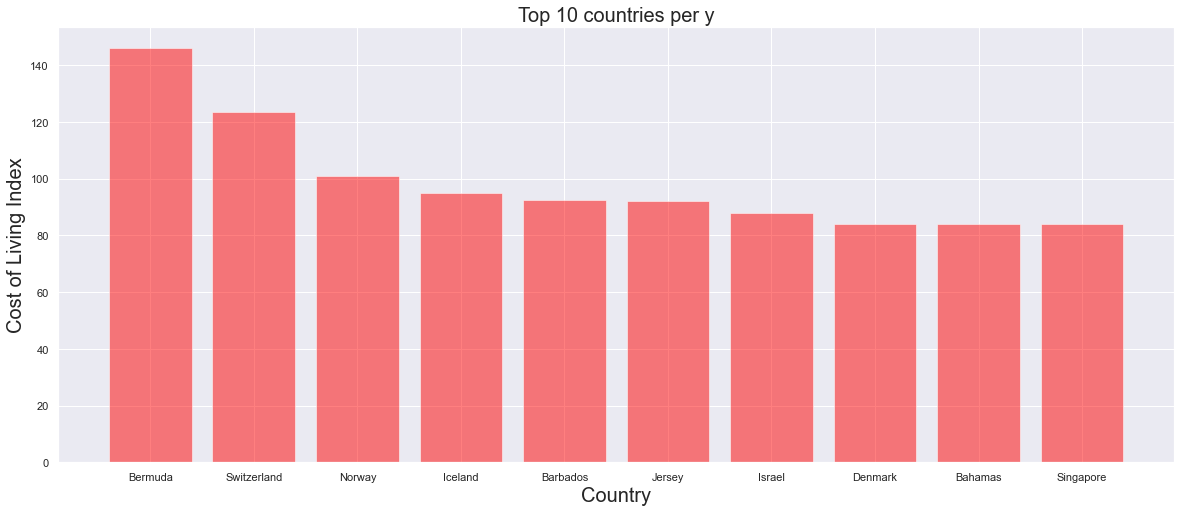

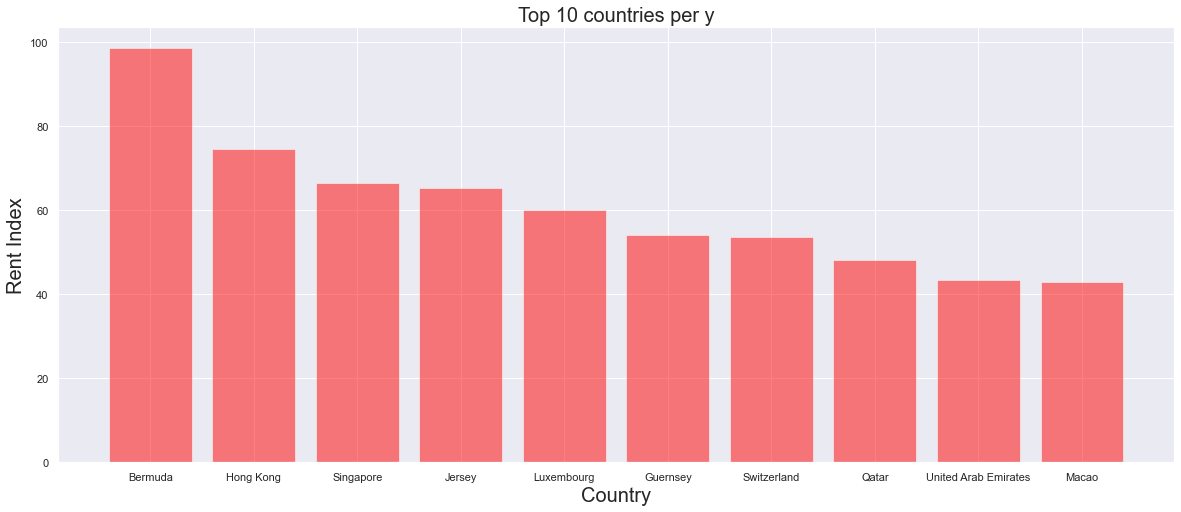

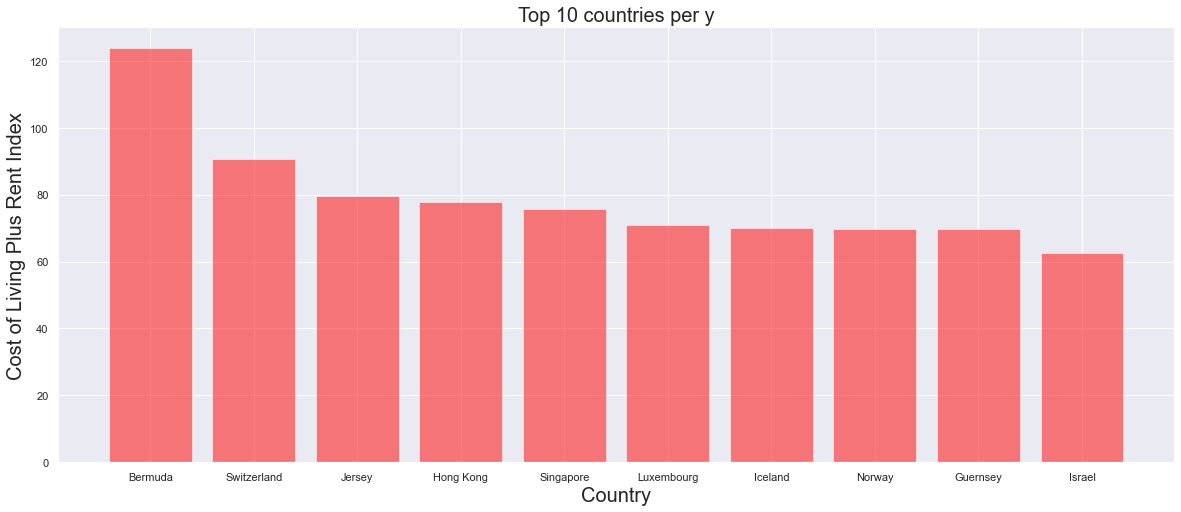

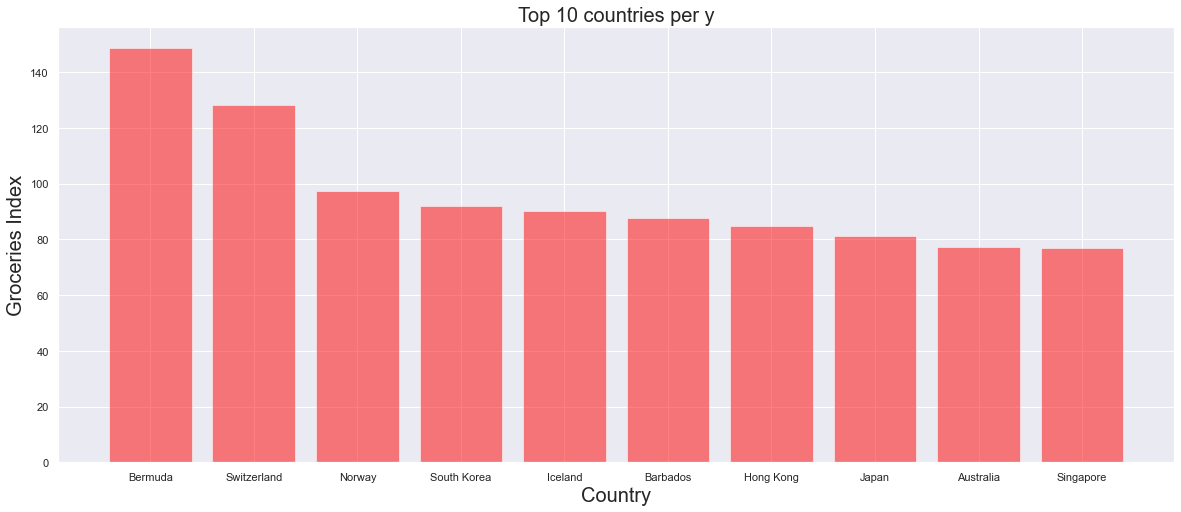

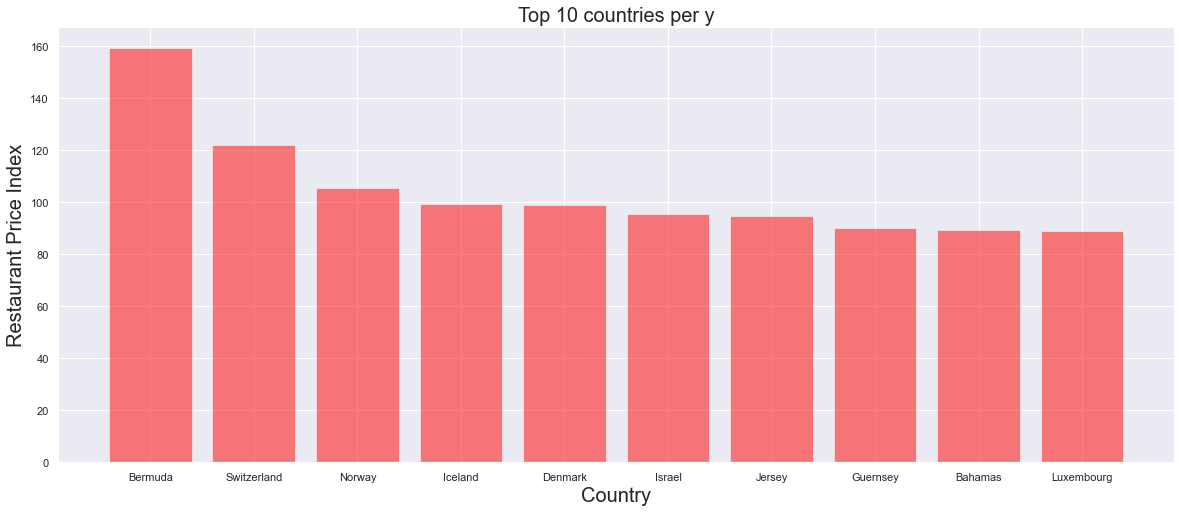

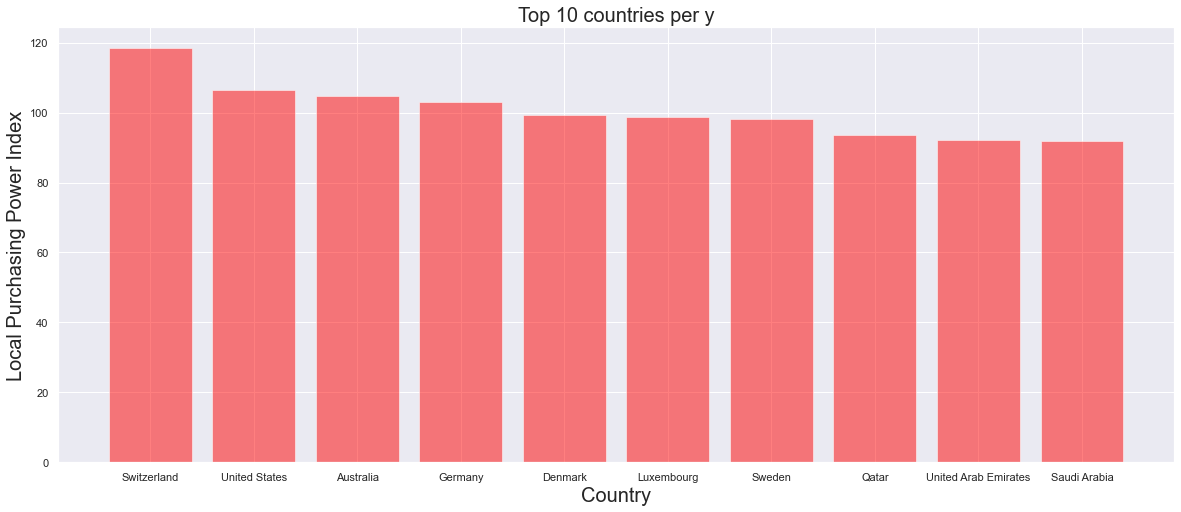

In [41]:
columns=['Cost of Living Index', 'Rent Index','Cost of Living Plus Rent Index', 'Groceries Index','Restaurant Price Index', 'Local Purchasing Power Index']
for column in columns:
  top10 = train.nlargest(10,column)
  plt.figure(figsize=(20,8))
  plt.bar(top10['Country'], top10[column],color='red',alpha=0.5)
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Country", fontsize = 20)
  plt.title("Top 10 countries per y", fontsize = 20)

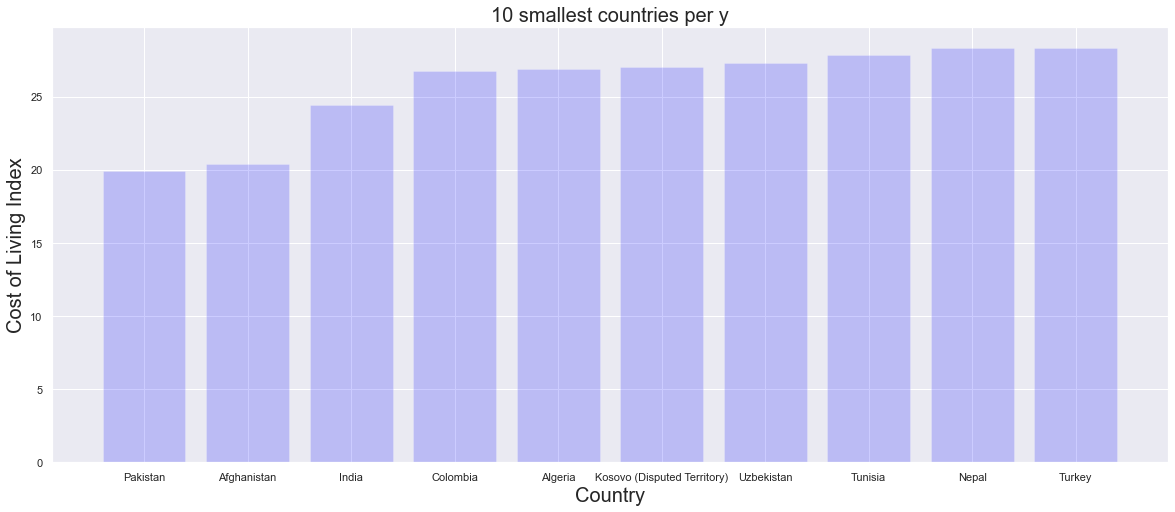

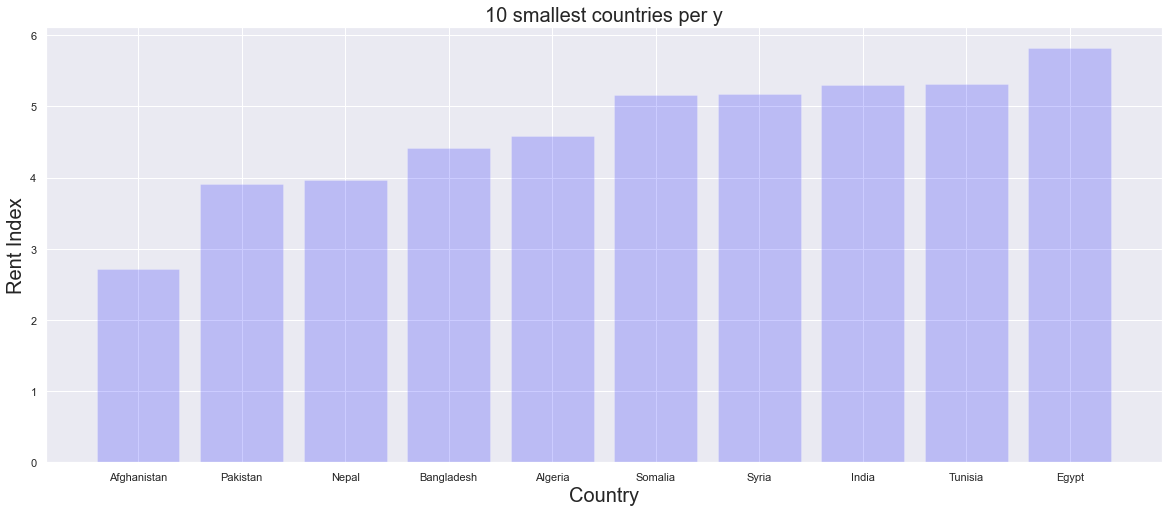

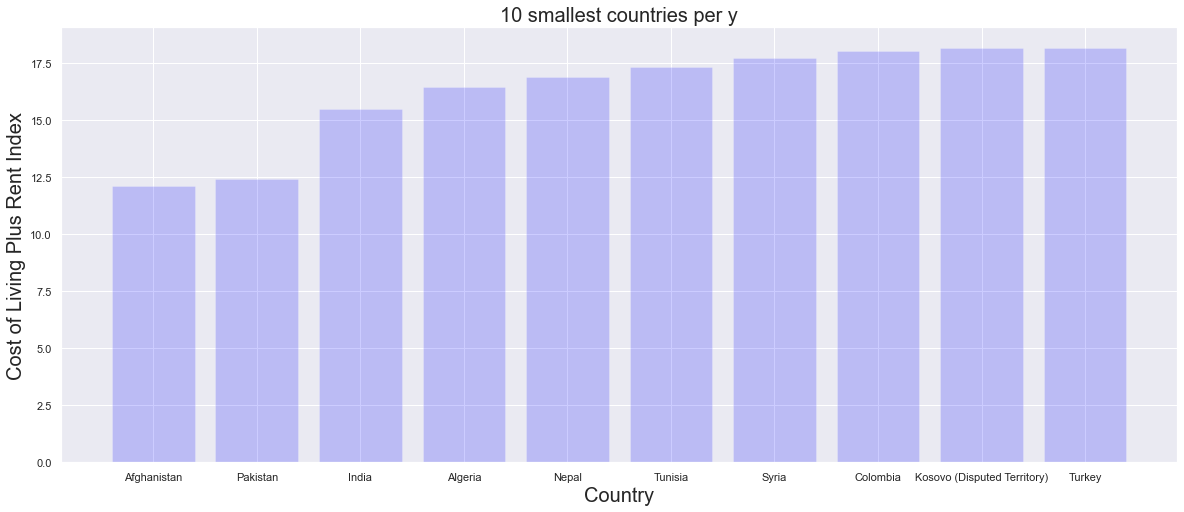

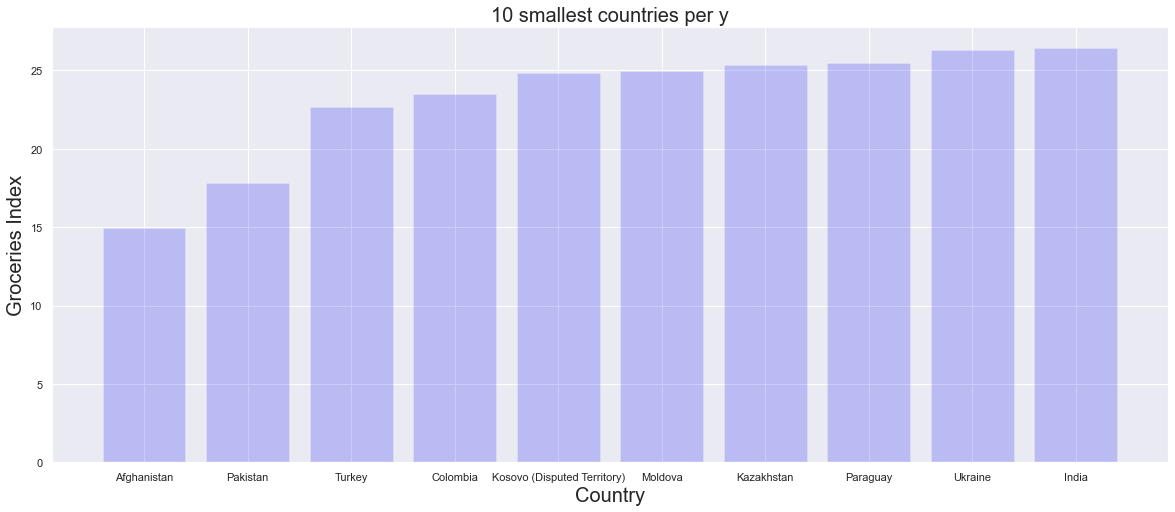

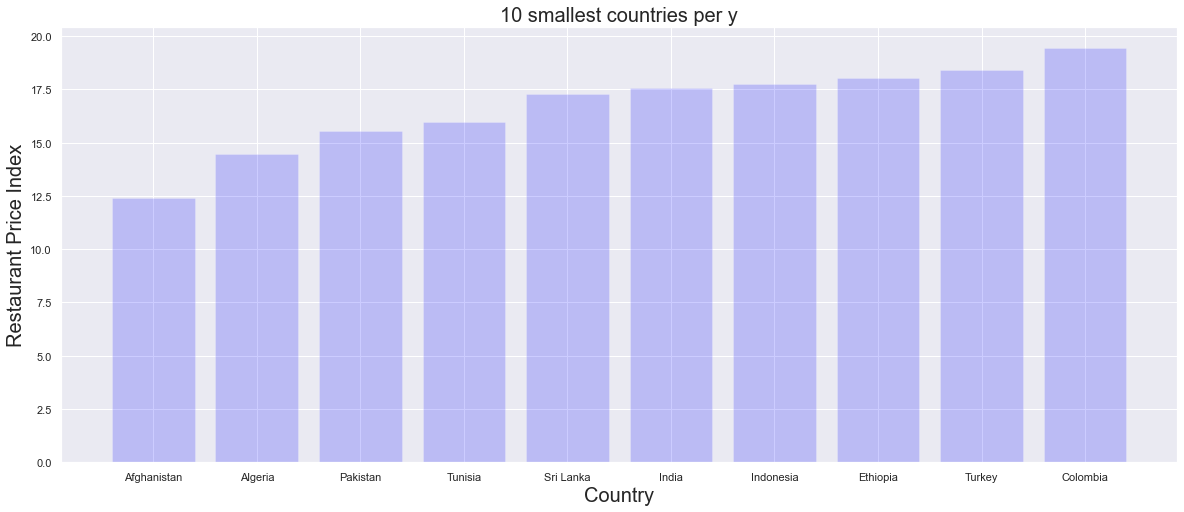

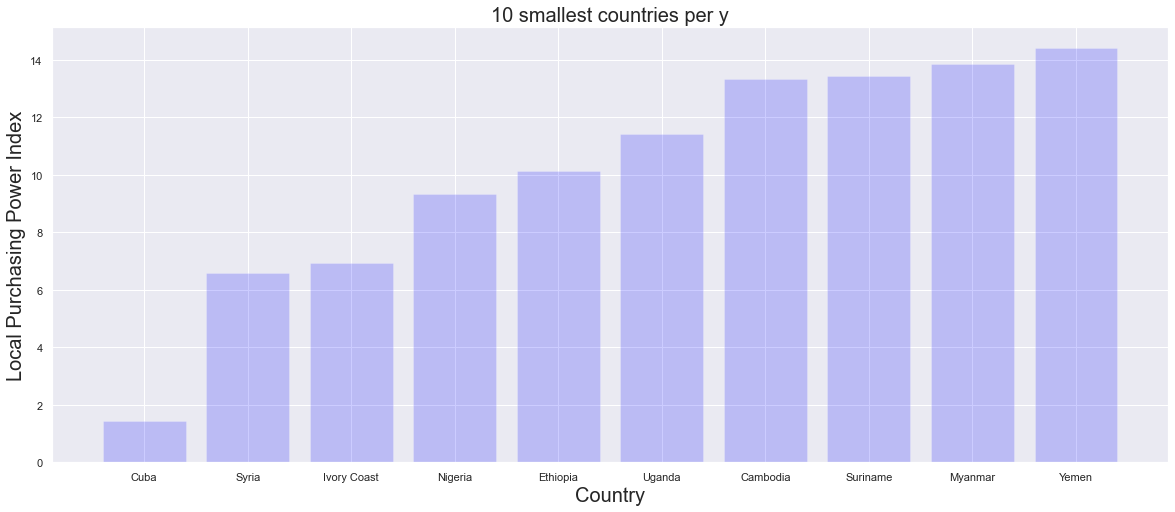

In [42]:
for column in columns:
  top10 = train.nsmallest(10,column)
  plt.figure(figsize=(20,8))
  plt.bar(top10['Country'], top10[column],color='blue',alpha=0.2)
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Country", fontsize = 20)
  plt.title("10 smallest countries per y", fontsize = 20)

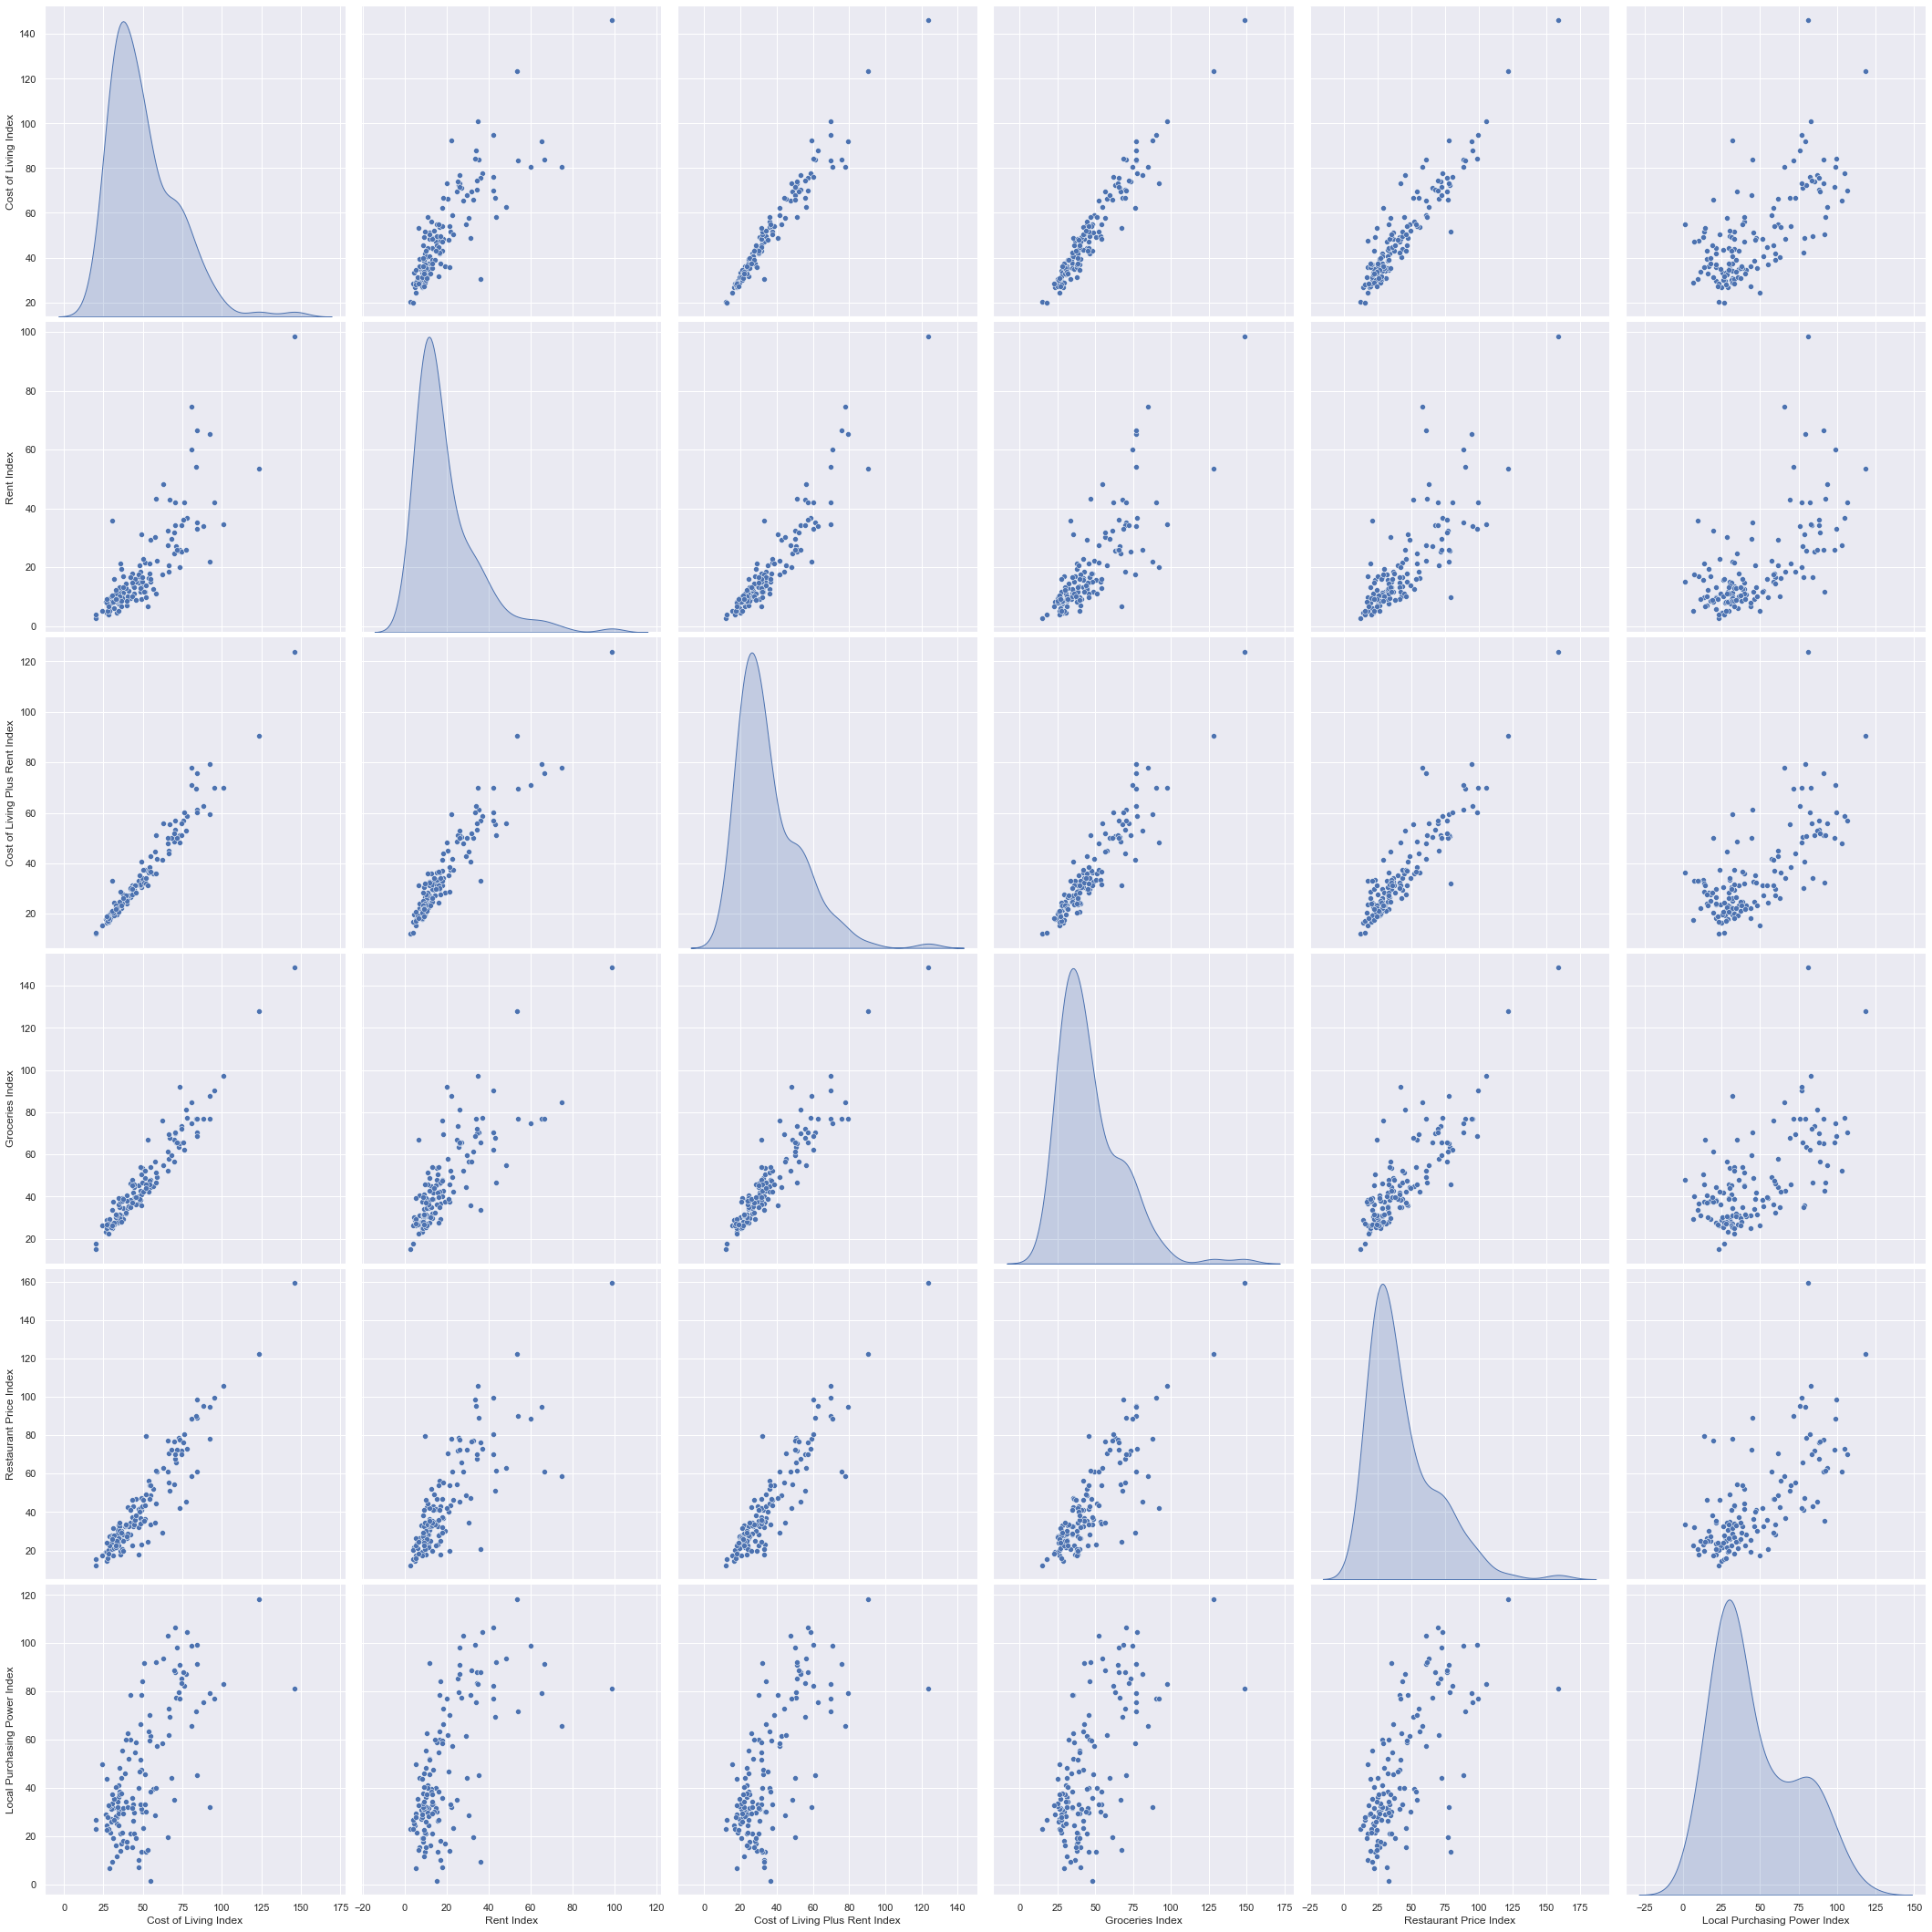

In [43]:
sns.set()
sns.pairplot(train[columns],height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

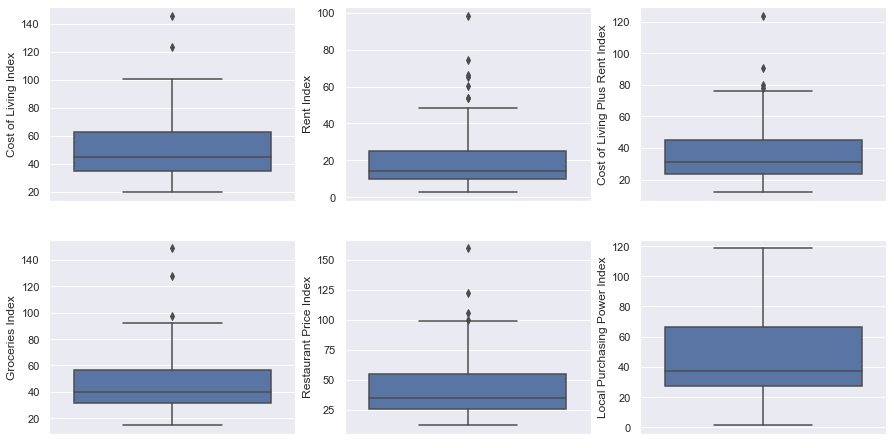

In [44]:
i=1
plt.figure(figsize=(15,25))
for feature in columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature])
    i+=1

In [45]:
USSR=train.loc[[103,12,128,64,7,4,42,68,37,71,79,133]]
USSR

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
103,Russia,35.26,13.09,24.87,29.86,34.56,37.41
12,Belarus,30.89,9.81,21.01,27.24,31.64,31.78
128,Ukraine,30.71,10.57,21.27,26.30,25.75,37.22
64,Kazakhstan,28.68,9.44,19.66,25.35,27.24,32.23
7,Azerbaijan,29.73,7.86,19.48,26.57,26.73,27.26
4,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
42,Georgia,30.18,9.26,20.37,26.44,27.88,31.15
68,Latvia,48.45,11.77,31.26,38.37,42.10,51.65
37,Estonia,53.68,16.37,36.19,42.29,56.43,63.46
71,Lithuania,45.65,15.01,31.29,36.18,46.64,58.74


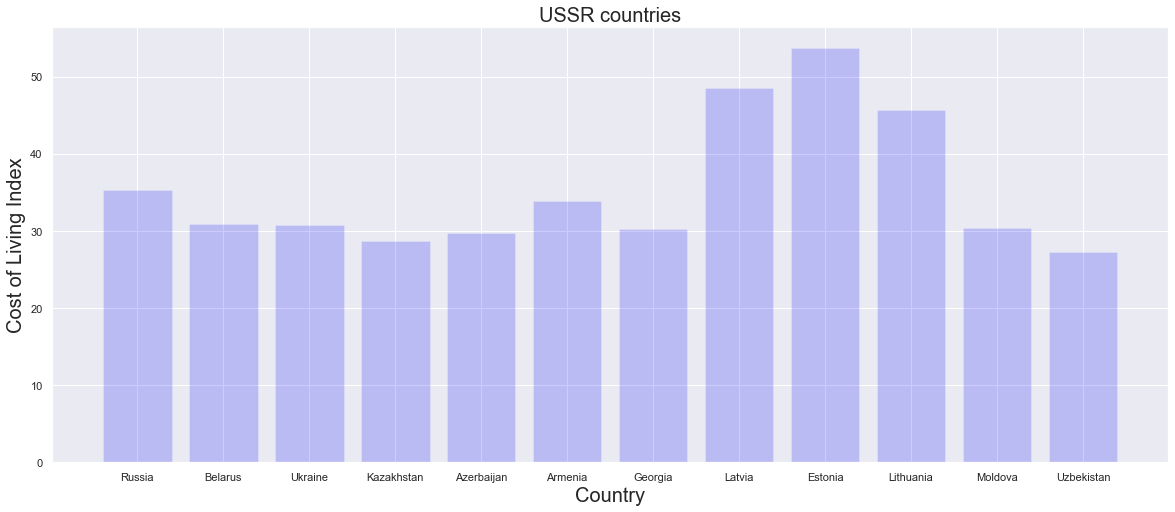

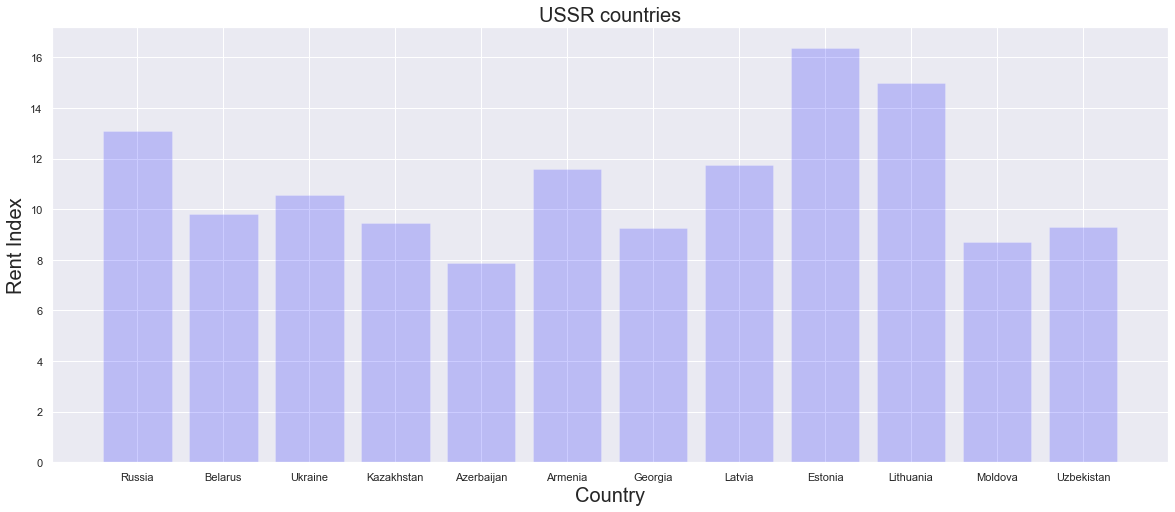

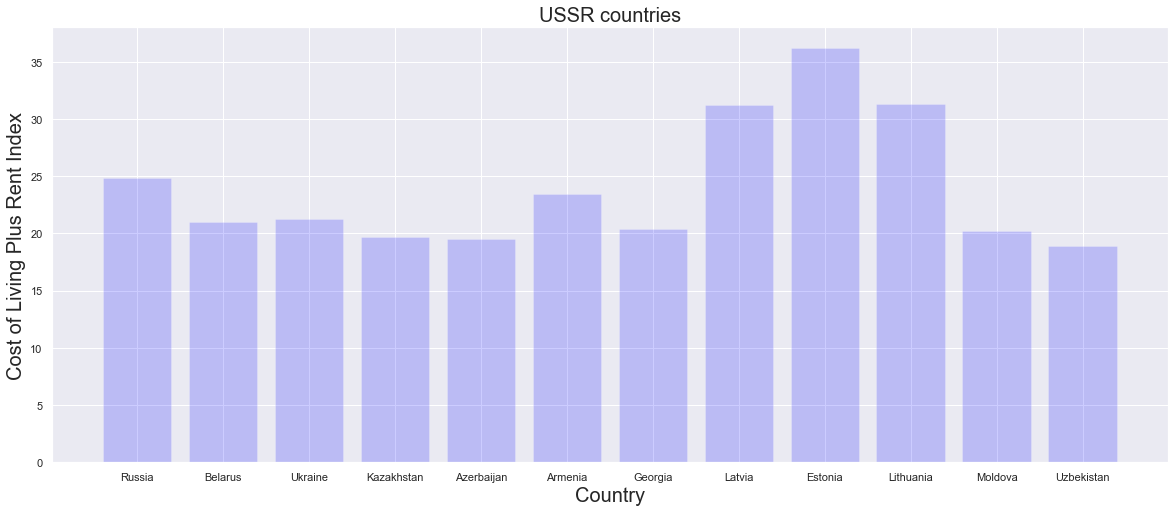

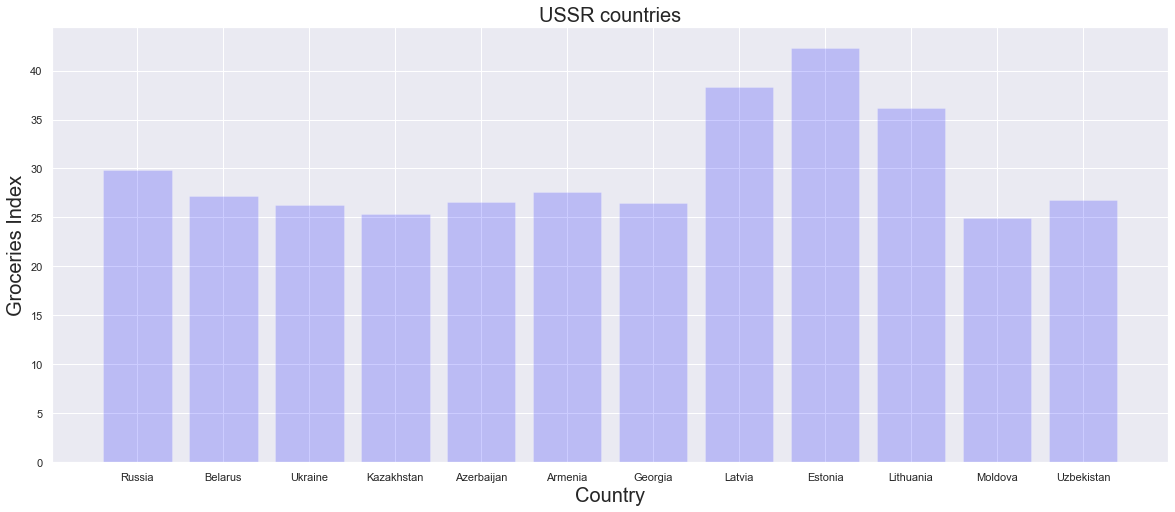

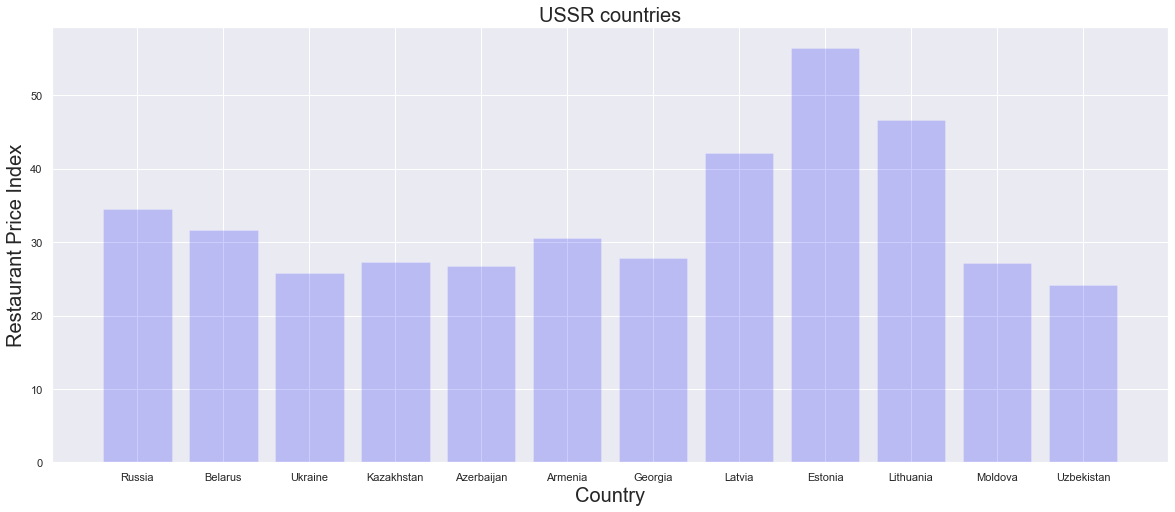

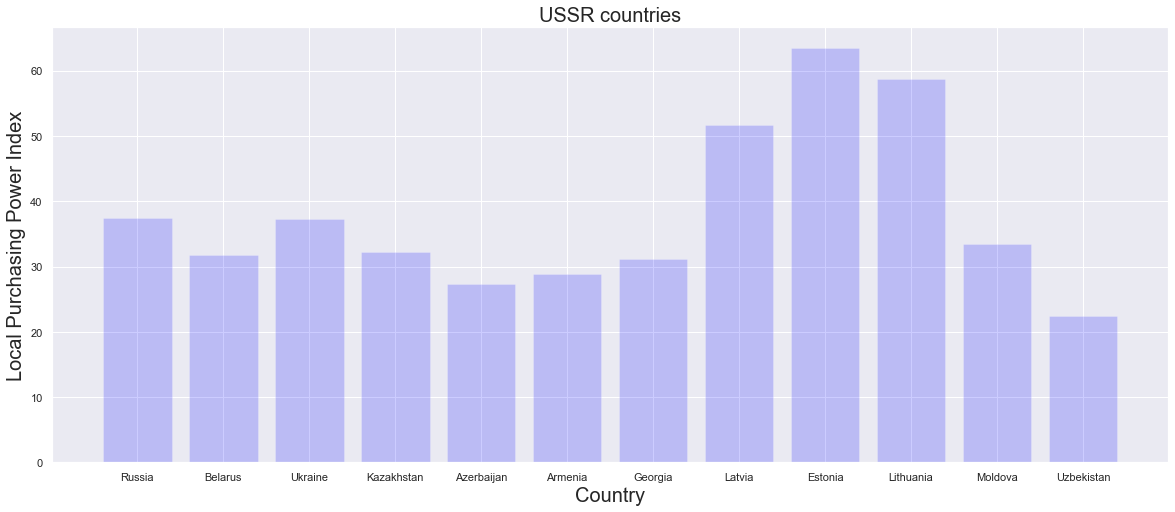

In [46]:
for column in columns:
  plt.figure(figsize=(20,8))
  plt.bar(USSR['Country'], USSR[column],color='blue',alpha=0.2)
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Country", fontsize = 20)
  plt.title("USSR countries", fontsize = 20)

In [47]:
train=train.set_index('Country')
train.columns

Index(['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
       'Groceries Index', 'Restaurant Price Index',
       'Local Purchasing Power Index'],
      dtype='object')

In [48]:
correlation = train.corr()
print(correlation['Cost of Living Index'].sort_values(ascending = False),'\n')

Cost of Living Index              1.000000
Cost of Living Plus Rent Index    0.974752
Groceries Index                   0.965435
Restaurant Price Index            0.934505
Rent Index                        0.838079
Local Purchasing Power Index      0.687244
Name: Cost of Living Index, dtype: float64 



Index(['Cost of Living Index', 'Cost of Living Plus Rent Index',
       'Groceries Index', 'Restaurant Price Index', 'Rent Index',
       'Local Purchasing Power Index'],
      dtype='object')


<AxesSubplot:>

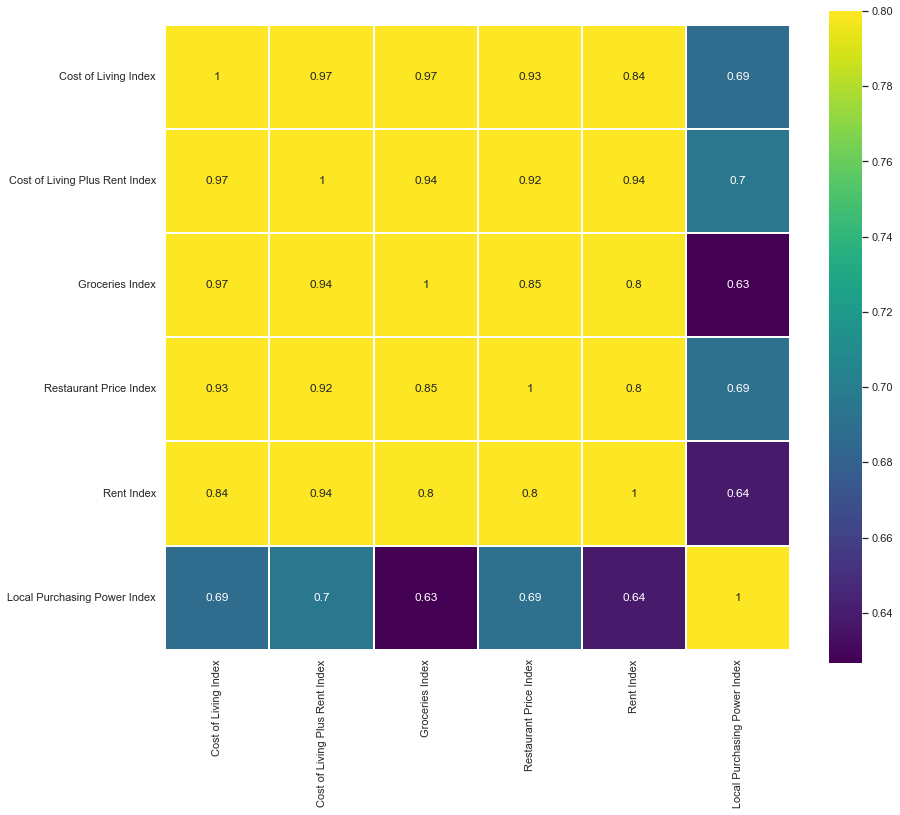

In [49]:
k= 6
cols = correlation.nlargest(k,'Cost of Living Index')['Cost of Living Index'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [50]:
y=train['Cost of Living Index']
train=train.drop(['Cost of Living Index'],axis=1)
from sklearn import ensemble, tree, linear_model
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test=train_test_split(train,y,test_size=0.1,random_state=42)
models = [RandomForestRegressor(), LinearRegression(),ElasticNet(), KNeighborsRegressor(),xgb.XGBRegressor()]
scores = dict()